# **1.   Creating a Google Colaboratory File**

---

Not: Proje çalıştırmadan önce githubda ekli bulunan Melbourne_housing_FULL.csv dosyasını colab ortamına eklemeyi unutmayınız.



# **2.   Importing Required Libraries**

---
Import the required libraries for the project to the Colab environment.

---
Proje için gerekli kitaplıkları Colab ortamına aktarın.



In [190]:
# Kütüphanelerin eklenmesi
# 4. Kısım işlemleri
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
# 5. Kısım işlemleri
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# 6. Kısım işlemleri
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score

# 7. Kısım işlemleri
from sklearn.metrics import  make_scorer, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

# **3. Project Definition**

---
For this project, we need to load the Melbourne Housing dataset into our project. The quality and amount of data we collect will determine how good our predictive model can be. For this reason, we need to examine the dataset very carefully. We will estimate the price of a house using the Melbourne Housing dataset, which is a real-life example. Before evaluating any cost, we will start by analyzing the data using preprocessing techniques. We will then build our models and measure their performance to complete the project.

---
Bu proje için Melbourne Housing veri setini projemize yüklememiz gerekiyor. Topladığımız verilerin kalitesi ve miktarı, tahmin modelimizin ne kadar iyi olabileceğini belirleyecektir. Bu nedenle veri setini çok dikkatli incelememiz gerekiyor. Gerçek hayattan bir örnek olan Melbourne Konut veri setini kullanarak bir evin fiyatını tahmin edeceğiz. Herhangi bir maliyeti değerlendirmeden önce, ön işleme tekniklerini kullanarak verileri analiz ederek başlayacağız. Daha sonra modellerimizi oluşturacağız ve projeyi tamamlamak için performanslarını ölçeceğiz.

# **4. Gathering and Observing Data**

---
Load the dataset to the project with the help of read_csv() and observe the first 5 columns

---
Veri setini read_csv() yardımıyla projeye yükleyin ve ilk 5 sütunu gözlemleyin



In [56]:
df = pd.read_csv("Melbourne_housing_FULL.csv", encoding = "UTF-8")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [57]:
df.shape

(34857, 21)

Bu datamız da 20 özellik ve 1 sonuc kolonu olmak üzere 21 kolonumuz, 34857 satır verimiz bulunuyor.

In [58]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Kolon isimlerimizi görmüş olduk.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [60]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Bazı kolonlarda null değerler var. Verimiz üzerinde bazı özelliklerin tipi object olarak gözüküyor.

In [61]:
object_columns= df.select_dtypes("object").columns
object_columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

Hangi kolonların object tipinde tanımlı olduğu görülür. Bu kolonların özellikleri incelendikten sonra düzenlenmesi gerekir.

# **5. Exploratory Data Analysis**

---
Examine the descriptive statistics of dataset.
The values of some variables are given as objects. At the same time, we observe that there are also categorical values. This might give us trouble when examining the dataset. Therefore, in such cases, we need to define the variables categorically.

---
Veri kümesinin tanımlayıcı istatistiklerini inceleyin.
Bazı değişkenlerin değerleri nesne olarak verilmiştir. Aynı zamanda kategorik değerlerin de olduğunu görüyoruz. Bu durum veri setini incelerken bize sıkıntı yaşatabilir. Dolayısıyla bu gibi durumlarda değişkenleri kategorik olarak tanımlamamız gerekir.




In [62]:
df["Suburb"].value_counts()

Reservoir          844
Bentleigh East     583
Richmond           552
Glen Iris          491
Preston            485
                  ... 
Belgrave             1
Cranbourne East      1
Yarra Glen           1
Olinda               1
Menzies Creek        1
Name: Suburb, Length: 351, dtype: int64

In [63]:
df["Address"].value_counts()

5 Charles St        6
25 William St       4
57 Bay Rd           3
5 Margaret St       3
16 Smith St         3
                   ..
17 Fraser St        1
11a Bewdley St      1
6/13 Ulupna Rd      1
428 North Rd        1
3 Tarrengower St    1
Name: Address, Length: 34009, dtype: int64

In [64]:
df["Type"].value_counts()

h    23980
u     7297
t     3580
Name: Type, dtype: int64

In [65]:
df["Method"].value_counts()

S     19744
SP     5095
PI     4850
VB     3108
SN     1317
PN      308
SA      226
W       173
SS       36
Name: Method, dtype: int64

In [66]:
df["SellerG"].value_counts()

Jellis             3359
Nelson             3236
Barry              3235
hockingstuart      2623
Marshall           2027
                   ... 
Clairmont             1
Buxton/Find           1
Harcourts/Barry       1
Silver                1
Methven               1
Name: SellerG, Length: 388, dtype: int64

In [67]:
df["Date"].value_counts()

28/10/2017    1119
17/03/2018     970
24/02/2018     941
9/12/2017      927
25/11/2017     902
              ... 
4/02/2016       44
30/09/2017      22
20/01/2018      19
27/01/2018      12
28/01/2016       3
Name: Date, Length: 78, dtype: int64

In [68]:
df["CouncilArea"].value_counts()

Boroondara City Council           3675
Darebin City Council              2851
Moreland City Council             2122
Glen Eira City Council            2006
Melbourne City Council            1952
Banyule City Council              1861
Moonee Valley City Council        1791
Bayside City Council              1764
Brimbank City Council             1593
Monash City Council               1466
Stonnington City Council          1460
Maribyrnong City Council          1451
Port Phillip City Council         1280
Hume City Council                 1214
Yarra City Council                1186
Manningham City Council           1046
Hobsons Bay City Council           942
Kingston City Council              871
Whittlesea City Council            828
Wyndham City Council               624
Whitehorse City Council            618
Maroondah City Council             506
Knox City Council                  371
Greater Dandenong City Council     314
Melton City Council                292
Frankston City Council   

In [69]:
df["Regionname"].value_counts()

Southern Metropolitan         11836
Northern Metropolitan          9557
Western Metropolitan           6799
Eastern Metropolitan           4377
South-Eastern Metropolitan     1739
Eastern Victoria                228
Northern Victoria               203
Western Victoria                115
Name: Regionname, dtype: int64

In [141]:
category_colums = object_columns.drop("Date")
# Ana veri bozulmaması için veri seti kopyalanır.
data = df.copy()
for column in category_colums:
  data[column] = data[column].astype("category")

data["Date"] = data["Date"].astype("datetime64[ns]")

<ipython-input-141-7769c7ce510f>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date"] = data["Date"].astype("datetime64[ns]")


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [143]:
print(f"Kolonların uniq değer sayısı:")
for column in data:
  print(f"  Column: {column} Deger: {data[column].nunique()}")

Kolonların uniq değer sayısı:
  Column: Suburb Deger: 351
  Column: Address Deger: 34009
  Column: Rooms Deger: 12
  Column: Type Deger: 3
  Column: Price Deger: 2871
  Column: Method Deger: 9
  Column: SellerG Deger: 388
  Column: Date Deger: 78
  Column: Distance Deger: 215
  Column: Postcode Deger: 211
  Column: Bedroom2 Deger: 15
  Column: Bathroom Deger: 11
  Column: Car Deger: 15
  Column: Landsize Deger: 1684
  Column: BuildingArea Deger: 740
  Column: YearBuilt Deger: 160
  Column: CouncilArea Deger: 33
  Column: Lattitude Deger: 13402
  Column: Longtitude Deger: 14524
  Column: Regionname Deger: 8
  Column: Propertycount Deger: 342


Kolon değerlerini incelediğimiz de adres bilgisi ortak değer oluşturmayacağı için çıkartılması sonucu etkilemiyecektir.

Kolon silinmesi işlemlerinde tekrardan veriseti kullanabilmek için kopyası oluşturulmuştur.

In [144]:
data_copy = data
data_copy2 = data

In [145]:
data_copy = data_copy.drop("Address", axis=1)
data_copy = data_copy.drop("BuildingArea", axis=1)
data_copy = data_copy.drop("YearBuilt", axis=1)

data_copy2 = data_copy2.drop("Address", axis=1)

In [146]:
print(f"Data1 {data_copy.duplicated().sum()}")
print(f"Data2 {data_copy2.duplicated().sum()}")

Data1 24
Data2 24


24 Tane benzer değer olduğu görülüyor.

In [147]:
data_copy.loc[data_copy.duplicated(keep=False), :]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1191,Balwyn North,4,h,NaN,SP,Marshall,2016-05-28,9.2,3104.0,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,7809.0
1192,Balwyn North,4,h,NaN,SP,Marshall,2016-05-28,9.2,3104.0,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,7809.0
2584,Burwood,4,t,1000050.0,S,Philip,2016-06-18,11.7,3125.0,NaN,NaN,NaN,NaN,Monash City Council,NaN,NaN,Southern Metropolitan,5678.0
2585,Burwood,4,t,1000050.0,S,Philip,2016-06-18,11.7,3125.0,NaN,NaN,NaN,NaN,Monash City Council,NaN,NaN,Southern Metropolitan,5678.0
2743,Camberwell,4,h,NaN,S,Marshall,2016-05-22,7.8,3124.0,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.0
2744,Camberwell,4,h,NaN,S,Marshall,2016-05-22,7.8,3124.0,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.0
2745,Camberwell,4,h,NaN,S,Marshall,2016-05-22,7.8,3124.0,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.0
6422,Malvern East,4,h,NaN,S,Jellis,2016-09-17,11.2,3145.0,NaN,NaN,NaN,NaN,Stonnington City Council,NaN,NaN,Southern Metropolitan,8801.0
6423,Malvern East,4,h,NaN,S,Jellis,2016-09-17,11.2,3145.0,NaN,NaN,NaN,NaN,Stonnington City Council,NaN,NaN,Southern Metropolitan,8801.0
6604,Maribyrnong,2,u,NaN,W,hockingstuart,2016-05-22,8.7,3032.0,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,4918.0


In [148]:
data_clear=data_copy.drop_duplicates()
data_clear2=data_copy2.drop_duplicates()

print(f"Data1 {data_clear.duplicated().sum()}")
print(f"Data2 {data_clear2.duplicated().sum()}")

Data1 0
Data2 0


In [149]:
print(pd.concat([data_clear.isnull().sum(), data_clear.isnull().sum()/len(data_clear)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

print(pd.concat([data_clear2.isnull().sum(), data_clear2.isnull().sum()/len(data_clear2)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                 0.000000
Rooms                                 0                 0.000000
Type                                  0                 0.000000
Price                              7596                21.806907
Method                                0                 0.000000
SellerG                               0                 0.000000
Date                                  0                 0.000000
Distance                              1                 0.002871
Postcode                              1                 0.002871
Bedroom2                           8194                23.523670
Bathroom                           8203                23.549508
Car                                8705                24.990670
Landsize                          11787                33.838601
CouncilArea                           3                 0.008613
Lattitude                

In [150]:
categorical_columns = data_clear.select_dtypes(include=["category"]).columns
numeric_columns = data_clear.select_dtypes(include=[np.number]).columns
print(categorical_columns)
print(numeric_columns)

categorical_columns2 = data_clear2.select_dtypes(include=["category"]).columns
numeric_columns2 = data_clear2.select_dtypes(include=[np.number]).columns
print(categorical_columns2)
print(numeric_columns2)

Index(['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'], dtype='object')
Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'Lattitude', 'Longtitude', 'Propertycount'],
      dtype='object')
Index(['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'], dtype='object')
Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


In [151]:
for column in numeric_columns:
  data_clear[column].fillna((data_clear[column].mean()), inplace=True)

print(pd.concat([data_clear.isnull().sum(), data_clear.isnull().sum()/len(data_clear)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

for column2 in numeric_columns2:
  data_clear2[column2].fillna((data_clear2[column2].mean()), inplace=True)

print(pd.concat([data_clear2.isnull().sum(), data_clear2.isnull().sum()/len(data_clear2)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                 0.000000
Rooms                                 0                 0.000000
Type                                  0                 0.000000
Price                                 0                 0.000000
Method                                0                 0.000000
SellerG                               0                 0.000000
Date                                  0                 0.000000
Distance                              0                 0.000000
Postcode                              0                 0.000000
Bedroom2                              0                 0.000000
Bathroom                              0                 0.000000
Car                                   0                 0.000000
Landsize                              0                 0.000000
CouncilArea                           3                 0.008613
Lattitude                

<ipython-input-151-d6611355c4b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clear[column].fillna((data_clear[column].mean()), inplace=True)
<ipython-input-151-d6611355c4b0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clear2[column2].fillna((data_clear2[column2].mean()), inplace=True)


In [158]:
data_clear["CouncilArea"].fillna((data_clear["CouncilArea"].mode()[0]), inplace=True)
data_clear["Regionname"].fillna((data_clear["Regionname"].mode()[0]), inplace=True)

print(pd.concat([data_clear.isnull().sum(), data_clear.isnull().sum()/len(data_clear)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

data_clear2["CouncilArea"].fillna((data_clear2["CouncilArea"].mode()[0]), inplace=True)
data_clear2["Regionname"].fillna((data_clear2["Regionname"].mode()[0]), inplace=True)

print(pd.concat([data_clear2.isnull().sum(), data_clear2.isnull().sum()/len(data_clear2)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                      0.0
Rooms                                 0                      0.0
Type                                  0                      0.0
Price                                 0                      0.0
Method                                0                      0.0
SellerG                               0                      0.0
Date                                  0                      0.0
Distance                              0                      0.0
Postcode                              0                      0.0
Bedroom2                              0                      0.0
Bathroom                              0                      0.0
Car                                   0                      0.0
Landsize                              0                      0.0
CouncilArea                           0                      0.0
Lattitude                

<ipython-input-158-ca096dd076e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clear["CouncilArea"].fillna((data_clear["CouncilArea"].mode()[0]), inplace=True)
<ipython-input-158-ca096dd076e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clear["Regionname"].fillna((data_clear["Regionname"].mode()[0]), inplace=True)
<ipython-input-158-ca096dd076e2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clear2["CouncilAre

Bu kısımda eksik değerlerimiz kalmamıştır. Kategori değerleri bulunduğu sayısal verilere çevirmemiz gerekiyor.

In [ ]:
# Label encoding ile kategori verilerini sayısal verilere dönüştürüldü.
label_encoder = LabelEncoder()

for column in categorical_columns:
  data_clear[column]= label_encoder.fit_transform(data_clear[column])

for column2 in categorical_columns2:
  data_clear2[column2]= label_encoder.fit_transform(data_clear2[column2])

Tüm Değerler nümerik yapıya dönüştürüldü.

# *5. Data Visualization*

---
* Build a Histogram to visualize price distribution.
* Draw a pair plot to see the relationship between all numerical variables and the price variable.
* Draw a correlation matrix by using a heatmap on seaborn
* Implement Label Encoder and One Hot encoder for categorical variables.

---
* Fiyat dağılımını görselleştirmek için bir Histogram oluşturun.
* Tüm sayısal değişkenler ile fiyat değişkeni arasındaki ilişkiyi görmek için bir çift grafiği çizin.
* Denizde doğan bir ısı haritası kullanarak bir korelasyon matrisi çizin
* Kategorik değişkenler için Label Encoder ve One Hot encoder'ı uygulayın



Text(0.5, 1.0, 'Price Dağılımı')

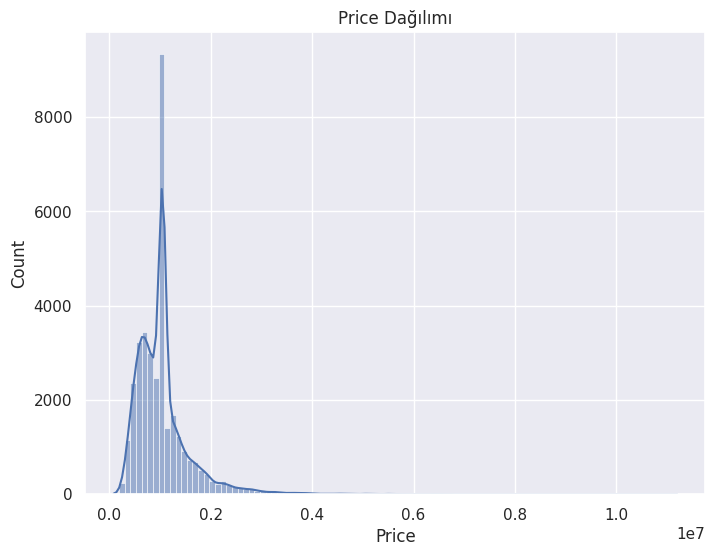

In [124]:
sns.set(rc={'figure.figsize':(8,6)})


sns.histplot(data_clear2["Price"], bins=100, kde=True)
plt.title("Price Dağılımı")


In [ ]:
sns.pairplot(data_clear2, hue="Price")

In [ ]:
plt.title('Correlation Matrix')
sns.heatmap(data_clear2.corr(), cmap="Blues", annot=True);

In [160]:
ohe_categorical_columns = []
for column in data_clear:
  if data_clear[column].nunique() < 10:
    ohe_categorical_columns.append(column)

print(ohe_categorical_columns)

ohe_categorical_columns2 = []
for column2 in data_clear2:
  if data_clear2[column2].nunique() < 10:
    ohe_categorical_columns2.append(column2)

print(ohe_categorical_columns2)

['Type', 'Method', 'Regionname']
['Type', 'Method', 'Regionname']


One Hot encoder uygulanması için kategorik kolonlar bulunur.

In [161]:
data_onehot = pd.get_dummies(data_clear, columns=ohe_categorical_columns)
data_onehot2 = pd.get_dummies(data_clear2, columns=ohe_categorical_columns2)

data_process = data_onehot.drop("Price", axis=1)
data_process2 = data_onehot2.drop("Price", axis=1)
data_process.head()

,Suburb,Rooms,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Method_8,Regionname_0,Regionname_1,Regionname_2,Regionname_3,Regionname_4,Regionname_5,Regionname_6,Regionname_7,Regionname_8
0,0,2,155,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,...,0,0,0,1,0,0,0,0,0,0
1,0,2,33,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,...,0,0,0,1,0,0,0,0,0,0
2,0,2,33,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,...,0,0,0,1,0,0,0,0,0,0
3,0,3,296,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0,3,33,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,...,0,0,0,1,0,0,0,0,0,0


Son hale getirdiğimiz veri setinin bazı özelliklerin baskın olmaması için normalleştirme uygulanır.

In [172]:
standart_scaler = StandardScaler()

data_process_sc = data_process.drop("Date", axis=1)
data_end = standart_scaler.fit_transform(data_process_sc)
dataset = DataFrame(data_end, columns = data_process_sc.columns)

data_process_sc2 = data_process2.drop("Date", axis=1)
data_end2 = standart_scaler.fit_transform(data_process_sc2)
dataset2 = DataFrame(data_end2, columns = data_process_sc2.columns)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34833 entries, 0 to 34832
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34833 non-null  float64
 1   Rooms          34833 non-null  float64
 2   SellerG        34833 non-null  float64
 3   Distance       34833 non-null  float64
 4   Postcode       34833 non-null  float64
 5   Bedroom2       34833 non-null  float64
 6   Bathroom       34833 non-null  float64
 7   Car            34833 non-null  float64
 8   Landsize       34833 non-null  float64
 9   CouncilArea    34833 non-null  float64
 10  Lattitude      34833 non-null  float64
 11  Longtitude     34833 non-null  float64
 12  Propertycount  34833 non-null  float64
 13  Type_0         34833 non-null  float64
 14  Type_1         34833 non-null  float64
 15  Type_2         34833 non-null  float64
 16  Method_0       34833 non-null  float64
 17  Method_1       34833 non-null  float64
 18  Method

# **6. Model Selection**

---
* Since we are going to make a price estimation, we need to determine our x and y variables correctly.
* Splitting our data into train-test in order to increase the performance of model training
* Train your models using preprocessed data with the models mentioned below


---
* Fiyat tahmini yapacağımız için x ve y değişkenlerimizi doğru belirlememiz gerekiyor.
* Model eğitiminin performansını artırmak için verilerimizi eğitim-teste bölmek
* Aşağıda belirtilen modellerle önceden işlenmiş verileri kullanarak modellerinizi eğitin


In [173]:
Y = data_onehot["Price"]
X = dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Y2 = data_onehot2["Price"]
X2 = dataset2

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2)

In [180]:
model_Lasso = Lasso()
model_Lasso.fit(X_train, Y_train)
y_pred_Lasso = model_Lasso.predict(X_test)

model_LinearR = LinearRegression()
model_LinearR.fit(X_train, Y_train)
y_pred_LinearR = model_LinearR.predict(X_test)

steps = [
    ('model', Ridge())
]

model_ridge = Pipeline(steps)
model_ridge.fit(X_train, Y_train)
y_pred_ridge = model_ridge.predict(X_test)

model_ElasticNet = ElasticNet()
model_ElasticNet.fit(X_train, Y_train)
y_pred_ElasticNet = model_ElasticNet.predict(X_test)

model_KNeighbors = KNeighborsRegressor()
model_KNeighbors.fit(X_train, Y_train)
y_pred_KNeighbors = model_KNeighbors.predict(X_test)

model_RandomForest = RandomForestRegressor()
model_RandomForest.fit(X_train, Y_train)
y_pred_RandomForest = model_RandomForest.predict(X_test)

model_GradientBoosting = GradientBoostingRegressor()
model_GradientBoosting.fit(X_train, Y_train)
y_pred_GradientBoosting= model_GradientBoosting.predict(X_test)

model_AdaBoost = AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
model_AdaBoost.fit(X_train, Y_train)
y_pred_AdaBoost = model_AdaBoost.predict(X_test)






/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.829e+14, tolerance: 8.820e+11
  model = cd_fast.enet_coordinate_descent(


In [188]:
model_Lasso2 = Lasso()
model_Lasso2.fit(X_train2, Y_train2)
y_pred_Lasso2 = model_Lasso2.predict(X_test2)

model_LinearR2 = LinearRegression()
model_LinearR2.fit(X_train2, Y_train2)
y_pred_LinearR2 = model_LinearR2.predict(X_test2)

steps = [
    ('model', Ridge())
]

model_ridge2 = Pipeline(steps)
model_ridge2.fit(X_train2, Y_train2)
y_pred_ridge2 = model_ridge2.predict(X_test2)

model_ElasticNet2 = ElasticNet()
model_ElasticNet2.fit(X_train2, Y_train2)
y_pred_ElasticNet2 = model_ElasticNet2.predict(X_test2)

model_KNeighbors2 = KNeighborsRegressor()
model_KNeighbors2.fit(X_train2, Y_train2)
y_pred_KNeighbors2 = model_KNeighbors2.predict(X_test2)

model_RandomForest2 = RandomForestRegressor()
model_RandomForest2.fit(X_train2, Y_train2)
y_pred_RandomForest2 = model_RandomForest2.predict(X_test2)

model_GradientBoosting2 = GradientBoostingRegressor()
model_GradientBoosting2.fit(X_train2, Y_train2)
y_pred_GradientBoosting2 = model_GradientBoosting2.predict(X_test2)

model_AdaBoost2 = AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
model_AdaBoost2.fit(X_train2, Y_train2)
y_pred_AdaBoost2 = model_AdaBoost2.predict(X_test2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.898e+14, tolerance: 8.983e+11
  model = cd_fast.enet_coordinate_descent(


# **7. Model Evaluation**

---
* Comparing models in each other
* Choose the best performing model by using evaluation metrics(MAE, MSE, RMSE, R2)


---
* Modellerin birbirleriyle karşılaştırılması
* Değerlendirme metriklerini (MAE, MSE, RMSE, R2) kullanarak en iyi performans gösteren modeli seçin





In [178]:
r2_Lasso = r2_score(Y_test, y_pred_Lasso)
mae_Lasso = mean_absolute_error(Y_test, y_pred_Lasso)
mse_Lasso = mean_squared_error(Y_test, y_pred_Lasso)

print("Lasso R² Score:", r2_Lasso)
print("Lasso Mean Absolute Error:", mae_Lasso)
print("Lasso Mean Squared Error:", mse_Lasso)

print()

r2_Lasso2 = r2_score(Y_test2, y_pred_Lasso2)
mae_Lasso2 = mean_absolute_error(Y_test2, y_pred_Lasso2)
mse_Lasso2 = mean_squared_error(Y_test2, y_pred_Lasso2)

print("Lasso R² Score:", r2_Lasso2)
print("Lasso Mean Absolute Error:", mae_Lasso2)
print("Lasso Mean Squared Error:", mse_Lasso2)

Lasso R² Score: 0.38156383309514974
Lasso Mean Absolute Error: 283763.923897648
Lasso Mean Squared Error: 212190940837.861

Lasso R² Score: 0.4276466218619105
Lasso Mean Absolute Error: 276002.23852703604
Lasso Mean Squared Error: 182942113017.3333


In [179]:
r2_LinearR = r2_score(Y_test, y_pred_LinearR)
mae_LinearR = mean_absolute_error(Y_test, y_pred_LinearR)
mse_LinearR = mean_squared_error(Y_test, y_pred_LinearR)

print("LinearR R² Score:", r2_LinearR)
print("LinearR Mean Absolute Error:", mae_LinearR)
print("LinearR Mean Squared Error:", mse_LinearR)

print()

r2_LinearR2 = r2_score(Y_test2, y_pred_LinearR2)
mae_LinearR2 = mean_absolute_error(Y_test2, y_pred_LinearR2)
mse_LinearR2 = mean_squared_error(Y_test2, y_pred_LinearR2)

print("LinearR R² Score:", r2_LinearR2)
print("LinearR Mean Absolute Error:", mae_LinearR2)
print("LinearR Mean Squared Error:", mse_LinearR2)

LinearR R² Score: 0.381565743273499
LinearR Mean Absolute Error: 283772.9201205375
LinearR Mean Squared Error: 212190285438.70615

LinearR R² Score: 0.4276435073901531
LinearR Mean Absolute Error: 276007.7489044046
LinearR Mean Squared Error: 182943108500.3094


In [182]:
r2_ridge = r2_score(Y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(Y_test, y_pred_ridge)
mse_ridge = mean_squared_error(Y_test, y_pred_ridge)

print("ridge R² Score:", r2_ridge)
print("ridge Mean Absolute Error:", mae_ridge)
print("ridge Mean Squared Error:", mse_ridge)

print()

r2_ridge2 = r2_score(Y_test2, y_pred_ridge2)
mae_ridge2 = mean_absolute_error(Y_test2, y_pred_ridge2)
mse_ridge2 = mean_squared_error(Y_test2, y_pred_ridge2)

print("ridge R² Score:", r2_ridge2)
print("ridge Mean Absolute Error:", mae_ridge2)
print("ridge Mean Squared Error:", mse_ridge2)

ridge R² Score: 0.3815648004932459
ridge Mean Absolute Error: 283763.17150677805
ridge Mean Squared Error: 212190608914.98328

ridge R² Score: 0.4276468686831174
ridge Mean Absolute Error: 276001.5174416757
ridge Mean Squared Error: 182942034125.52475


In [183]:
r2_ElasticNet = r2_score(Y_test, y_pred_ElasticNet)
mae_ElasticNet = mean_absolute_error(Y_test, y_pred_ElasticNet)
mse_ElasticNet = mean_squared_error(Y_test, y_pred_ElasticNet)

print("ElasticNet R² Score:", r2_ElasticNet)
print("ElasticNet Mean Absolute Error:", mae_ElasticNet)
print("ElasticNet Mean Squared Error:", mse_ElasticNet)

print()

r2_ElasticNet2 = r2_score(Y_test2, y_pred_ElasticNet2)
mae_ElasticNet2 = mean_absolute_error(Y_test2, y_pred_ElasticNet2)
mse_ElasticNet2 = mean_squared_error(Y_test2, y_pred_ElasticNet2)

print("ElasticNet R² Score:", r2_ElasticNet2)
print("ElasticNet Mean Absolute Error:", mae_ElasticNet2)
print("ElasticNet Mean Squared Error:", mse_ElasticNet2)

ElasticNet R² Score: 0.3528834097947363
ElasticNet Mean Absolute Error: 287227.38116164564
ElasticNet Mean Squared Error: 222031448766.43298

ElasticNet R² Score: 0.39476900641634594
ElasticNet Mean Absolute Error: 281332.4446591147
ElasticNet Mean Squared Error: 193450831355.2056


In [184]:
r2_KNeighbors = r2_score(Y_test, y_pred_KNeighbors)
mae_KNeighbors = mean_absolute_error(Y_test, y_pred_KNeighbors)
mse_KNeighbors = mean_squared_error(Y_test, y_pred_KNeighbors)

print("KNeighbors R² Score:", r2_KNeighbors)
print("KNeighbors Mean Absolute Error:", mae_KNeighbors)
print("KNeighbors Mean Squared Error:", mse_KNeighbors)

print()

r2_KNeighbors2 = r2_score(Y_test2, y_pred_KNeighbors2)
mae_KNeighbors2 = mean_absolute_error(Y_test2, y_pred_KNeighbors2)
mse_KNeighbors2 = mean_squared_error(Y_test2, y_pred_KNeighbors2)

print("KNeighbors R² Score:", r2_KNeighbors2)
print("KNeighbors Mean Absolute Error:", mae_KNeighbors2)
print("KNeighbors Mean Squared Error:", mse_KNeighbors2)

KNeighbors R² Score: 0.4108678343105089
KNeighbors Mean Absolute Error: 248170.24274531173
KNeighbors Mean Squared Error: 202136477789.03748

KNeighbors R² Score: 0.4497507576981403
KNeighbors Mean Absolute Error: 243225.27647874953
KNeighbors Mean Squared Error: 175876937077.50262


In [185]:
r2_RandomForest = r2_score(Y_test, y_pred_RandomForest)
mae_RandomForest = mean_absolute_error(Y_test, y_pred_RandomForest)
mse_RandomForest = mean_squared_error(Y_test, y_pred_RandomForest)

print("RandomForest R² Score:", r2_RandomForest)
print("RandomForest Mean Absolute Error:", mae_RandomForest)
print("RandomForest Mean Squared Error:", mse_RandomForest)

print()

r2_RandomForest2 = r2_score(Y_test2, y_pred_RandomForest2)
mae_RandomForest2 = mean_absolute_error(Y_test2, y_pred_RandomForest2)
mse_RandomForest2 = mean_squared_error(Y_test2, y_pred_RandomForest2)

print("RandomForest R² Score:", r2_RandomForest2)
print("RandomForest Mean Absolute Error:", mae_RandomForest2)
print("RandomForest Mean Squared Error:", mse_RandomForest2)

RandomForest R² Score: 0.4799215982676772
RandomForest Mean Absolute Error: 226211.2103902427
RandomForest Mean Squared Error: 178443518148.91748

RandomForest R² Score: 0.559342086794881
RandomForest Mean Absolute Error: 218821.89620614843
RandomForest Mean Squared Error: 140848106849.30298


In [189]:
r2_GradientBoosting = r2_score(Y_test, y_pred_GradientBoosting)
mae_GradientBoosting = mean_absolute_error(Y_test, y_pred_GradientBoosting)
mse_GradientBoosting = mean_squared_error(Y_test, y_pred_GradientBoosting)

print("GradientBoosting R² Score:", r2_GradientBoosting)
print("GradientBoosting Mean Absolute Error:", mae_GradientBoosting)
print("GradientBoosting Mean Squared Error:", mse_GradientBoosting)

print()

r2_GradientBoosting2 = r2_score(Y_test2, y_pred_GradientBoosting2)
mae_GradientBoosting2 = mean_absolute_error(Y_test2, y_pred_GradientBoosting2)
mse_GradientBoosting2 = mean_squared_error(Y_test2, y_pred_GradientBoosting2)

print("GradientBoosting R² Score:", r2_GradientBoosting2)
print("GradientBoosting Mean Absolute Error:", mae_GradientBoosting2)
print("GradientBoosting Mean Squared Error:", mse_GradientBoosting2)

GradientBoosting R² Score: -0.45021582051893394
GradientBoosting Mean Absolute Error: 482098.9072119007
GradientBoosting Mean Squared Error: 497581926545.3923

GradientBoosting R² Score: 0.5402338153662529
GradientBoosting Mean Absolute Error: 237157.52092798686
GradientBoosting Mean Squared Error: 146955710446.63608


In [200]:
r2_AdaBoost = r2_score(Y_test, y_pred_AdaBoost)
mae_AdaBoost = mean_absolute_error(Y_test, y_pred_AdaBoost)
mse_AdaBoost = mean_squared_error(Y_test, y_pred_AdaBoost)

print("AdaBoost R² Score:", r2_AdaBoost)
print("AdaBoost Mean Absolute Error:", mae_AdaBoost)
print("AdaBoost Mean Squared Error:", mse_AdaBoost)

print()

r2_AdaBoost2 = r2_score(Y_test2, y_pred_AdaBoost2)
mae_AdaBoost2 = mean_absolute_error(Y_test2, y_pred_AdaBoost2)
mse_AdaBoost2 = mean_squared_error(Y_test2, y_pred_AdaBoost2)

print("AdaBoost R² Score:", r2_AdaBoost2)
print("AdaBoost Mean Absolute Error:", mae_AdaBoost2)
print("AdaBoost Mean Squared Error:", mse_AdaBoost2)

AdaBoost R² Score: 0.306033278772155
AdaBoost Mean Absolute Error: 318766.62828401814
AdaBoost Mean Squared Error: 238106144769.11368

AdaBoost R² Score: 0.29392636029493047
AdaBoost Mean Absolute Error: 340319.4228001103
AdaBoost Mean Squared Error: 225683307773.4019
